In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# EDA for the NYC taxi trip data set

# Univariate Analysis

In [2]:
#reading the data and converting it into dataframes
df=pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df['trip_duration_hrs']=df['trip_duration']/3600
df['trip_duration_hrs'].describe()

count    729322.000000
mean          0.264508
std           1.073507
min           0.000278
25%           0.110278
50%           0.184167
75%           0.298611
max         538.815556
Name: trip_duration_hrs, dtype: float64

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hrs
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556


In [5]:
#taking a random sample from the dataset which has approximatel 72000 data points
sample=df.sample(frac=0.1,random_state=1)

In [6]:
sample.trip_duration.max()

1939736

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hrs
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0.264508
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.073507
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000278
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,0.110278
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0.184167
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0.298611
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,538.815556


In [8]:
sample.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hrs
count,72932.000000,72932.000000,72932.000000,72932.000000,72932.000000,72932.000000,7.293200e+04,72932.000000
mean,1.536061,1.661561,-73.973530,40.750955,-73.973269,40.751867,9.735276e+02,0.270424
std,0.498701,1.312679,0.044169,0.034660,0.045017,0.038875,7.822348e+03,2.172874
min,1.000000,0.000000,-79.569733,35.310307,-80.355431,35.173546,2.000000e+00,0.000556
25%,1.000000,1.000000,-73.991859,40.737537,-73.991259,40.736102,3.940000e+02,0.109444
50%,2.000000,1.000000,-73.981789,40.754330,-73.979828,40.754532,6.580000e+02,0.182778
75%,2.000000,2.000000,-73.967468,40.768388,-73.962875,40.769860,1.075000e+03,0.298611
max,2.000000,6.000000,-72.074333,41.586273,-72.022408,42.090183,1.939736e+06,538.815556


In [9]:
sample['trip_duration_hrs'].describe()

count    72932.000000
mean         0.270424
std          2.172874
min          0.000556
25%          0.109444
50%          0.182778
75%          0.298611
max        538.815556
Name: trip_duration_hrs, dtype: float64

In [10]:
sample.drop(columns=['trip_duration'],inplace=True)

In [11]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs
455488,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,N,0.224444
112922,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,N,0.352500
713928,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,N,0.358333
287988,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,N,0.188889
29862,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,N,0.151944


In [12]:
sample.shape

(72932, 11)

In [13]:
#converting pickup_datetime and dropoff_datetime to datetime data type
sample['pickup_datetime']=pd.to_datetime(sample['pickup_datetime'])
sample['dropoff_datetime']=pd.to_datetime(sample['dropoff_datetime'])

In [14]:
sample['pickup_day']=sample['pickup_datetime'].dt.weekday
sample['pickup_hour']=sample['pickup_datetime'].dt.hour
sample['pickup_hour'].describe()

count    72932.000000
mean        13.628750
std          6.408211
min          0.000000
25%          9.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: pickup_hour, dtype: float64

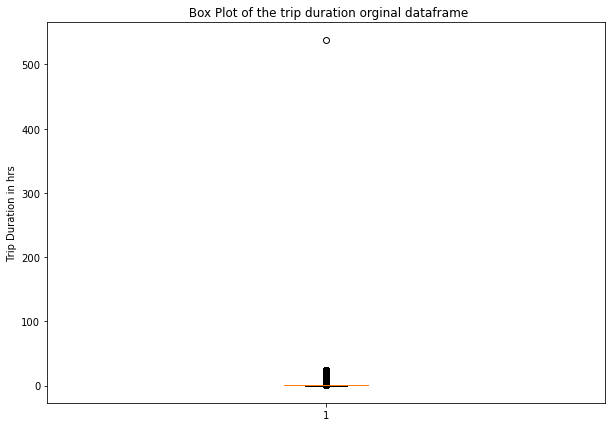

In [15]:
plt.figure(figsize=(10,7))
plt.boxplot(df['trip_duration_hrs'])
plt.title(" Box Plot of the trip duration orginal dataframe")
plt.ylabel(" Trip Duration in hrs ")
plt.show()

In [16]:
#Using the describe function before removing outliers from the target variable
sample['trip_duration_hrs'].describe()

count    72932.000000
mean         0.270424
std          2.172874
min          0.000556
25%          0.109444
50%          0.182778
75%          0.298611
max        538.815556
Name: trip_duration_hrs, dtype: float64

In [17]:
sample

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
455488,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,N,0.224444,3,10
112922,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,N,0.352500,2,18
713928,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,N,0.358333,3,11
287988,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,N,0.188889,0,21
29862,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,N,0.151944,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73470,id2475921,1,2016-03-25 10:52:42,2016-03-25 11:00:33,1,-73.986534,40.751839,-73.980682,40.765621,N,0.130833,4,10
548575,id1665559,2,2016-02-12 15:15:53,2016-02-12 15:38:40,5,-74.006218,40.749527,-74.000519,40.723869,N,0.379722,4,15
257620,id0261534,1,2016-04-29 23:41:13,2016-04-29 23:44:03,1,-73.950462,40.686958,-73.940331,40.688156,N,0.047222,4,23
3018,id1734527,2,2016-06-17 12:29:41,2016-06-18 12:28:43,1,-73.981789,40.746292,-73.984619,40.763962,N,23.983889,4,12


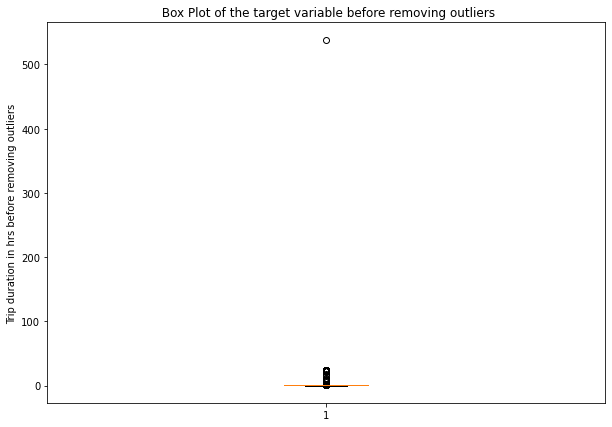

In [18]:
# Boxplot of the target variable trip duration_hrs before removing outliers
plt.figure(figsize=(10,7))
plt.boxplot(sample['trip_duration_hrs'])
plt.ylabel("Trip duration in hrs before removing outliers")
plt.title(" Box Plot of the target variable before removing outliers")
plt.show()


In [19]:
sample.head()
sample.reset_index(drop=True,inplace=True)

In [20]:
sample.shape

(72932, 13)

In [21]:
sample.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration_hrs     0
pickup_day            0
pickup_hour           0
dtype: int64

In [22]:
sample.shape

(72932, 13)

In [23]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,N,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,N,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,N,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,N,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,N,0.151944,1,10


In [24]:
q={'N':0,'Y':1}
sample['store_and_fwd_flag']=sample['store_and_fwd_flag'].map(q)

In [25]:
sample.reset_index(drop=True,inplace=True)

In [26]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10


In [27]:
sample.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration_hrs            float64
pickup_day                     int64
pickup_hour                    int64
dtype: object

In [28]:
sample.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration_hrs', 'pickup_day', 'pickup_hour'],
      dtype='object')

In [29]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hrs
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0.264508
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.073507
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000278
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,0.110278
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0.184167
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0.298611
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,538.815556


In [30]:
#Before removing the outliers this function describes the trip_duration_hrs column
sample['trip_duration_hrs'].describe()

count    72932.000000
mean         0.270424
std          2.172874
min          0.000556
25%          0.109444
50%          0.182778
75%          0.298611
max        538.815556
Name: trip_duration_hrs, dtype: float64

# Transformations on the target variable

Removing the outliers from the target variable

In [31]:



def outliers(upper_limit,lower_limit):
    outliers_list=[]
    for i in sample['trip_duration_hrs']:
        if i > upper_limit:
            outliers_list.append(i)
        elif i < lower_limit:
             outliers_list.append(i)
    return outliers_list  
    print(outliers_list)
    
Q1=sample['trip_duration_hrs'].quantile(.25)
Q3=sample['trip_duration_hrs'].quantile(.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
lower_limit=sample['trip_duration_hrs'].min()
out=outliers(upper_limit,lower_limit)
#removing the outliers from the target variable by deleting the rows in it

sample=sample[sample['trip_duration_hrs'].isin(out)==False]


    


In [32]:
upper_limit

0.5823611111111111

In [33]:
lower_limit

0.0005555555555555556

In [34]:
print(out)

[0.9566666666666667, 0.6530555555555555, 0.6052777777777778, 0.5916666666666667, 0.8594444444444445, 0.7038888888888889, 0.6877777777777778, 0.5847222222222223, 0.6211111111111111, 0.6225, 1.6575, 0.7172222222222222, 0.7141666666666666, 0.9694444444444444, 0.7605555555555555, 0.6652777777777777, 0.9458333333333333, 0.8788888888888889, 1.2183333333333333, 0.8019444444444445, 0.7027777777777777, 0.655, 1.2825, 0.8327777777777777, 0.7238888888888889, 0.8127777777777778, 0.6180555555555556, 0.7569444444444444, 0.8919444444444444, 0.7841666666666667, 0.6952777777777778, 0.7647222222222222, 0.6916666666666667, 0.685, 0.6466666666666666, 0.6402777777777777, 0.6113888888888889, 0.9061111111111111, 0.6213888888888889, 23.974722222222223, 0.6927777777777778, 0.9083333333333333, 0.5933333333333334, 1.2858333333333334, 0.7547222222222222, 0.6313888888888889, 0.9833333333333333, 0.7997222222222222, 0.5972222222222222, 1.1097222222222223, 0.6880555555555555, 0.9602777777777778, 0.7436111111111111, 0

In [35]:
len(out)

3669

In [36]:
sample.shape

(69263, 13)

In [37]:
#Describe function for the target variable after removing outliers
sample['trip_duration_hrs'].describe()

count    69263.000000
mean         0.203048
std          0.124970
min          0.000556
25%          0.105833
50%          0.174444
75%          0.275556
max          0.582222
Name: trip_duration_hrs, dtype: float64

In [38]:
sample.shape

(69263, 13)

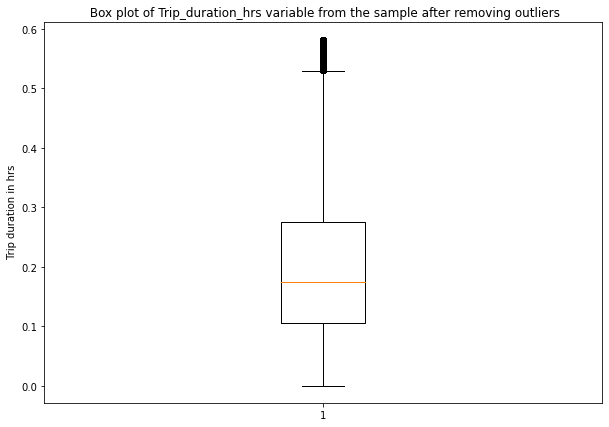

In [39]:
plt.figure(figsize=(10,7))
plt.boxplot(sample['trip_duration_hrs'])
plt.ylabel(" Trip duration in hrs")
plt.title(" Box plot of Trip_duration_hrs variable from the sample after removing outliers")
plt.show()

In [40]:
sample.shape

(69263, 13)

In [41]:
sample.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration_hrs', 'pickup_day', 'pickup_hour'],
      dtype='object')

In [42]:
sample.shape

(69263, 13)

In [43]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10


# Analysis of Independent Variable

In [44]:
sample.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration_hrs            float64
pickup_day                     int64
pickup_hour                    int64
dtype: object

In [45]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10


# Analysis of Passenger Count Variable

In [46]:
#Use of describe function before removing outliers from the passenger count variable
sample['passenger_count'].describe()

count    69263.000000
mean         1.658923
std          1.311299
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [47]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10


In [48]:
sample.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration_hrs', 'pickup_day', 'pickup_hour'],
      dtype='object')

In [49]:
#checking the corelation between all the variables
sample.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
vendor_id,1.000000,0.290966,0.012300,0.005513,0.005793,0.007955,-0.075978,0.003728,0.006409,0.012063
passenger_count,0.290966,1.000000,0.000295,-0.001597,-0.000521,0.002440,-0.025142,0.010153,0.025550,0.011418
pickup_longitude,0.012300,0.000295,1.000000,-0.102033,0.644794,-0.128031,0.009176,0.113149,-0.020848,0.005603
pickup_latitude,0.005513,-0.001597,-0.102033,1.000000,-0.122032,0.700913,-0.001947,-0.088122,-0.036998,0.022779
dropoff_longitude,0.005793,-0.000521,0.644794,-0.122032,1.000000,-0.034173,0.010447,0.123455,0.002533,-0.042649
dropoff_latitude,0.007955,0.002440,-0.128031,0.700913,-0.034173,1.000000,-0.004743,-0.089033,-0.024559,0.019687
store_and_fwd_flag,-0.075978,-0.025142,0.009176,-0.001947,0.010447,-0.004743,1.000000,0.011109,-0.004393,0.000919
trip_duration_hrs,0.003728,0.010153,0.113149,-0.088122,0.123455,-0.089033,0.011109,1.000000,-0.018381,0.029754
pickup_day,0.006409,0.025550,-0.020848,-0.036998,0.002533,-0.024559,-0.004393,-0.018381,1.000000,-0.086758
pickup_hour,0.012063,0.011418,0.005603,0.022779,-0.042649,0.019687,0.000919,0.029754,-0.086758,1.000000


From the above co-relation matrix it seems that there is a quite a good amount of correlation between (dropff_longitude,pickup_longitude), (dropoff_latitude,pickup_latitude),(pickup_longitude,dropoff_longitude), (pickup_latitude,dropoff_latitude)

In [50]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10


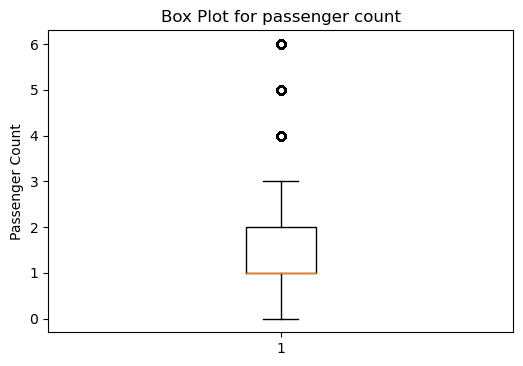

In [51]:
#Box Plot of Sample passenger count before removing outliers
plt.figure(dpi=100)
plt.boxplot(sample['passenger_count'])
plt.ylabel("Passenger Count")
plt.title("Box Plot for passenger count")
plt.show()

From the above box plot we can see that there are some outliers in the passenger_count columns which needs to be removed

You can clearly see from the above graph that passnger count of 4,5,6 are the outliers in this dataset which need to replaced by the mean of passenger count

In [52]:
sample['passenger_count'].unique()

array([1, 3, 2, 6, 4, 5, 0], dtype=int64)

In [53]:
sample['passenger_count'].describe()

count    69263.000000
mean         1.658923
std          1.311299
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Clearly the passenger Count of 4,5,6 are the outliers and they need to be replaced by the mean of that column

In [54]:
sample.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration_hrs            float64
pickup_day                     int64
pickup_hour                    int64
dtype: object

In [55]:
sample.reset_index(drop=True,inplace=True)

In [56]:
sample.shape

(69263, 13)

In [57]:
sample.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
69258,id2804119,2,2016-06-21 09:30:01,2016-06-21 09:55:05,1,-73.946777,40.775864,-73.975365,40.761646,0,0.417778,1,9
69259,id2475921,1,2016-03-25 10:52:42,2016-03-25 11:00:33,1,-73.986534,40.751839,-73.980682,40.765621,0,0.130833,4,10
69260,id1665559,2,2016-02-12 15:15:53,2016-02-12 15:38:40,5,-74.006218,40.749527,-74.000519,40.723869,0,0.379722,4,15
69261,id0261534,1,2016-04-29 23:41:13,2016-04-29 23:44:03,1,-73.950462,40.686958,-73.940331,40.688156,0,0.047222,4,23
69262,id0657460,2,2016-01-20 13:02:14,2016-01-20 13:16:23,2,-73.997810,40.713528,-73.967789,40.757038,0,0.235833,2,13


# Removing the outliers from the passenger count variable

In [58]:
sample['passenger_count'].replace(to_replace=[4,5,6],value=sample['passenger_count'].mean(),inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [59]:
#Describe function afer removing outliers from the passenger_count by replacing them by mean values
sample['passenger_count'].describe()

count    69263.000000
mean         1.292836
std          0.515957
min          0.000000
25%          1.000000
50%          1.000000
75%          1.658923
max          3.000000
Name: passenger_count, dtype: float64

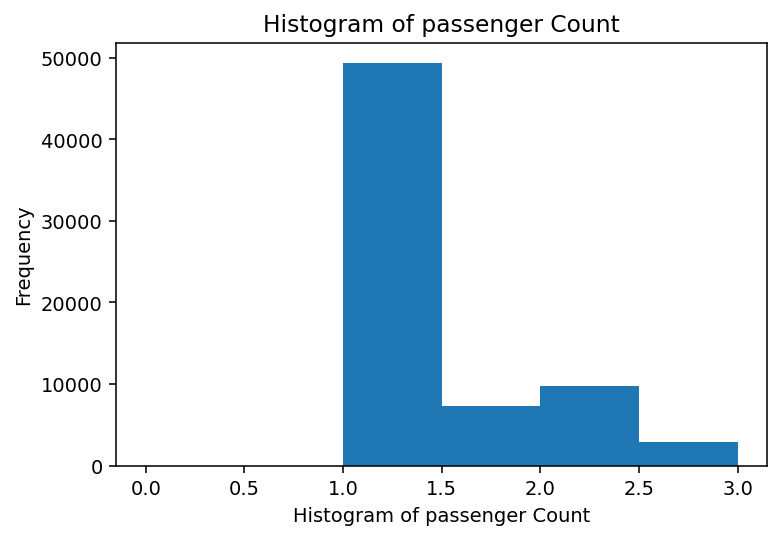

In [60]:
#Histogram of passenger count variable after removing outliers
plt.figure(dpi=140)
plt.hist(sample['passenger_count'], bins=6)
plt.xlabel("Histogram of passenger Count")
plt.ylabel("Frequency")
plt.title("Histogram of passenger Count")
plt.show()


As you can see from the above histogram the passenger count of 1 to 2 has the highest frequency that means most of the trips had a passenger_count between 0 and 2 

In [61]:
sample.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration_hrs', 'pickup_day', 'pickup_hour'],
      dtype='object')

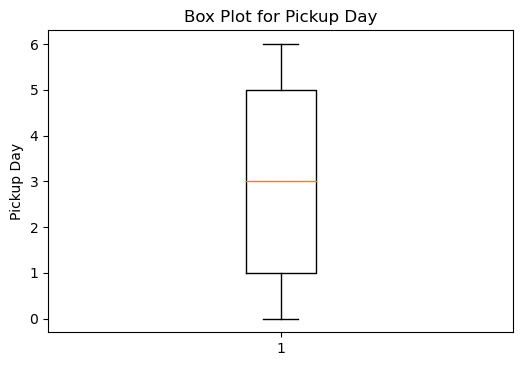

In [62]:
plt.figure(dpi=100)
plt.boxplot(sample['pickup_day'])
plt.ylabel("Pickup Day")
plt.title("Box Plot for Pickup Day")
plt.show()

This box plot shows that pickup day doesn't have any outliers

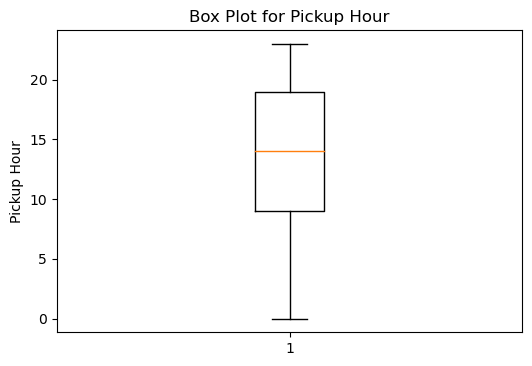

In [63]:
plt.figure(dpi=100)
plt.boxplot(sample['pickup_hour'])
plt.ylabel("Pickup Hour")
plt.title("Box Plot for Pickup Hour")
plt.show()

This box plot shows that pickup hour doesn't have any outliers

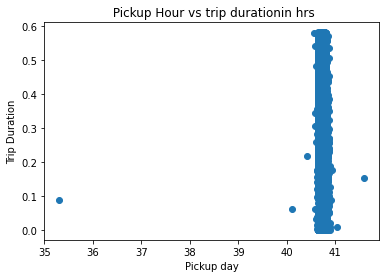

In [64]:
#Checking the relation between pickup hour and trip duration
plt.scatter(sample['pickup_latitude'],sample['trip_duration_hrs'])
plt.xlabel("Pickup day")
plt.ylabel("Trip Duration")
plt.title(" Pickup Hour vs trip durationin hrs")
plt.show()

In [65]:
sample.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
vendor_id,1.000000,0.156832,0.012300,0.005513,0.005793,0.007955,-0.075978,0.003728,0.006409,0.012063
passenger_count,0.156832,1.000000,-0.005147,-0.013563,-0.002212,-0.004696,-0.014552,0.018442,0.043683,0.023311
pickup_longitude,0.012300,-0.005147,1.000000,-0.102033,0.644794,-0.128031,0.009176,0.113149,-0.020848,0.005603
pickup_latitude,0.005513,-0.013563,-0.102033,1.000000,-0.122032,0.700913,-0.001947,-0.088122,-0.036998,0.022779
dropoff_longitude,0.005793,-0.002212,0.644794,-0.122032,1.000000,-0.034173,0.010447,0.123455,0.002533,-0.042649
dropoff_latitude,0.007955,-0.004696,-0.128031,0.700913,-0.034173,1.000000,-0.004743,-0.089033,-0.024559,0.019687
store_and_fwd_flag,-0.075978,-0.014552,0.009176,-0.001947,0.010447,-0.004743,1.000000,0.011109,-0.004393,0.000919
trip_duration_hrs,0.003728,0.018442,0.113149,-0.088122,0.123455,-0.089033,0.011109,1.000000,-0.018381,0.029754
pickup_day,0.006409,0.043683,-0.020848,-0.036998,0.002533,-0.024559,-0.004393,-0.018381,1.000000,-0.086758
pickup_hour,0.012063,0.023311,0.005603,0.022779,-0.042649,0.019687,0.000919,0.029754,-0.086758,1.000000


In [66]:
import h3
from h3 import point_dist

In [67]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1.0,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1.0,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1.0,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1.0,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3.0,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10


In [68]:
distance=sample[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]

In [69]:
distance.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.750320,-73.991409,40.762032,-73.978813
1,40.773289,-73.981850,40.757240,-73.978973
2,40.774055,-73.873032,40.776676,-73.744003
3,40.762280,-73.968178,40.788422,-73.970680
4,40.705070,-74.017197,40.722599,-74.007240


In [70]:
#creating the distance feature from the latitude and longitude
dist_km=[]
for i in range(0,69263):
    dist_km.append(h3._cy.geo.point_dist(distance.iloc[i,0],distance.iloc[i,1],distance.iloc[i,2],distance.iloc[i,3]))

In [71]:
len(dist_km)

69263

In [72]:
dist_km[0:5]

[1.6797100602862092,
 1.8008720344725144,
 10.868779277603032,
 2.9145019206870857,
 2.1220550528693938]

In [73]:
#creating a new feature in the sample dataset
sample['distance_kms']=dist_km

<ipython-input-73-43c04644ce2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['distance_kms']=dist_km


In [74]:
len(dist_km)

69263

In [75]:
sample.shape

(69263, 14)

In [76]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour,distance_kms
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1.0,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10,1.679710
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1.0,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18,1.800872
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1.0,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11,10.868779
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1.0,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21,2.914502
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3.0,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10,2.122055


As we can see from the above matrix the distance_kms column has a positive co-relation with the  the target variable so we can use it to create our first benchmark linear regression model

Text(0.5, 1.0, ' Box Plot for distance_kms variable')

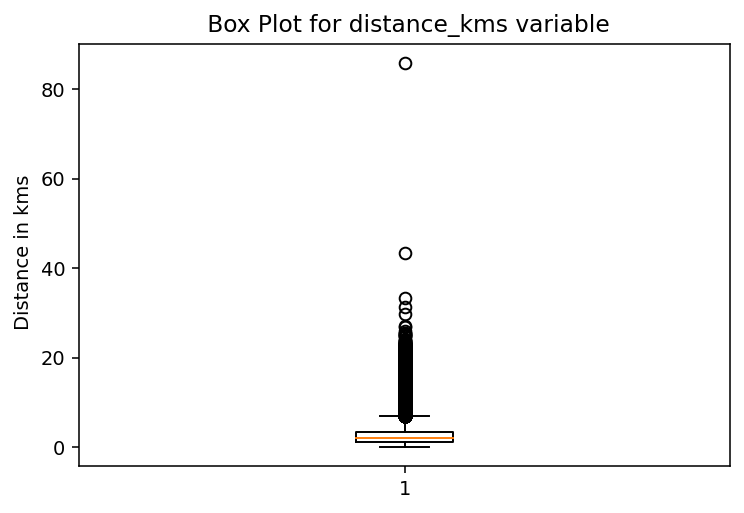

In [78]:
#checking for outliers
plt.figure(dpi=140)
plt.boxplot(sample['distance_kms'])
plt.ylabel(" Distance in kms")
plt.title(" Box Plot for distance_kms variable")

In [79]:
sample['distance_kms'].describe()

count    69263.000000
mean         2.913444
std          2.930460
min          0.000000
25%          1.189397
50%          1.984817
75%          3.488179
max         85.884973
Name: distance_kms, dtype: float64

In [80]:
#removing the outliers from the distance_kms variable
Q1_dist=sample['distance_kms'].quantile(.25)
Q3_dist=sample['distance_kms'].quantile(.75)
IQR_dist=Q3_dist-Q1_dist
upper_limit_dist=Q3_dist+1.5*IQR_dist
lower_limit_dist=0
# As the minimum value for distance_kms variable is 0 we set the lower limit to 0

def outliers_distance(upper_limit_dist,lower_limit_dist):
    outliers_dist=[]
    for i in sample['distance_kms']:
        if i > upper_limit_dist:
            outliers_dist.append(i)
        elif i < lower_limit_dist:
            outliers_dist.append(i)
    return outliers_dist
outliers_distance=outliers_distance(upper_limit_dist,lower_limit_dist)
print(outliers_distance)


[10.868779277603032, 10.357937494148308, 8.177872475425243, 9.01670304479258, 9.266683780843033, 13.941879395536247, 21.718901805478385, 7.064000264801301, 9.576437564927792, 8.161658983594519, 19.565326798900653, 13.743859266044325, 21.665999806799814, 17.42223917309022, 15.622160274534654, 15.280723790132315, 10.793001678205814, 9.093732063516482, 13.670534044185358, 9.369006953471184, 8.106085182371775, 10.906149778798268, 9.57891632527618, 8.655079445236852, 16.586423609013863, 8.112640410277342, 10.606031702270322, 15.768091834255705, 8.5166068368245, 7.16841622097577, 16.934435299125074, 12.463385577565965, 18.917735158838813, 9.078473021811535, 9.124082768460203, 10.80580480998995, 13.690179071250745, 12.663995146040238, 7.844914747414473, 8.095558567046663, 9.115827312751, 8.239622933726837, 16.247315609420404, 9.240616684768806, 9.298141736757632, 12.818441422659848, 10.358521786600397, 14.281037592353632, 7.346664027571051, 6.999923761312495, 13.461973812962361, 7.15475253427

In [81]:
upper_limit_dist

6.936353008534086

In [82]:
lower_limit_dist

0

In [84]:
sample['distance_kms'].isnull().sum()

0

Replacing the outliers in the distance kms variables by median of it as mean can change because of outliers

In [86]:
for i in sample['distance_kms']:
    for j in outliers_distance:
        if(i==j):
            sample['distance_kms'].replace(to_replace=i,value=sample['distance_kms'].median(),inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [87]:
sample['distance_kms'].describe()

count    69263.000000
mean         2.222030
std          1.421552
min          0.000000
25%          1.189397
50%          1.984817
75%          2.843885
max          6.935176
Name: distance_kms, dtype: float64

In [88]:
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour,distance_kms
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1.0,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10,1.679710
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1.0,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18,1.800872
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1.0,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11,1.984817
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1.0,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21,2.914502
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3.0,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10,2.122055


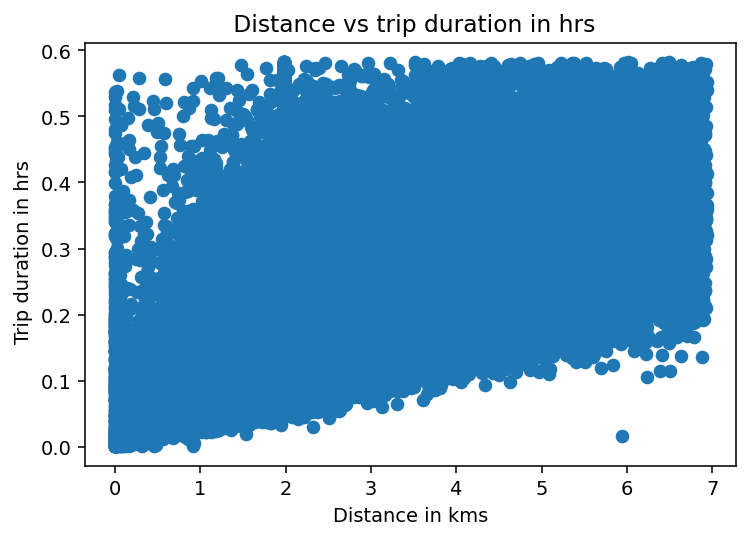

In [90]:
# creating a scatter plot for our new feature distance and trip duration in hrs
plt.figure(dpi=140)
plt.title(" Distance vs trip duration in hrs")
plt.xlabel("Distance in kms")
plt.ylabel(" Trip duration in hrs")
#plt.plot(sample['mean_trip_duration'],color='Red')
plt.scatter(sample['distance_kms'],sample['trip_duration_hrs'])
plt.show()

# Actually building the benchmark model as we have removed the outliers from the distance_kms variable

In [91]:
sample['mean_trip_duration']=sample['trip_duration_hrs'].mean()

<ipython-input-91-2ca4915ab7d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['mean_trip_duration']=sample['trip_duration_hrs'].mean()


In [92]:
sample['mean_trip_duration']

0        0.203048
1        0.203048
2        0.203048
3        0.203048
4        0.203048
           ...   
69258    0.203048
69259    0.203048
69260    0.203048
69261    0.203048
69262    0.203048
Name: mean_trip_duration, Length: 69263, dtype: float64

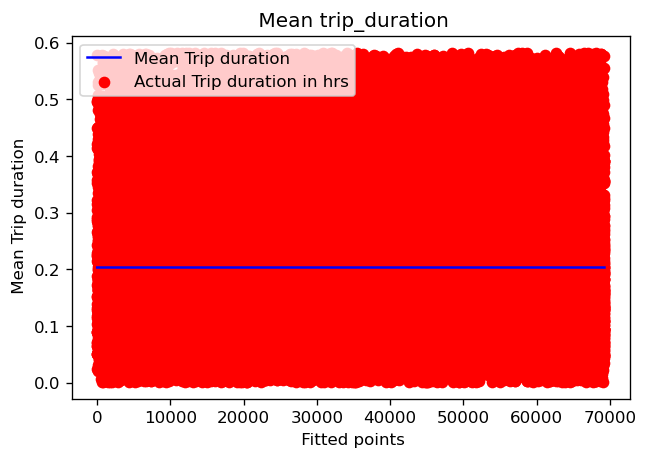

In [93]:
plt.figure(dpi=120)
a=range(0,len(sample))
plt.scatter(a,sample['trip_duration_hrs'],color='Red',label='Actual Trip duration in hrs')
plt.plot(a,sample['mean_trip_duration'],color='Blue',label='Mean Trip duration')
plt.xlabel(" Fitted points")
plt.ylabel(" Mean Trip duration")
plt.title(" Mean trip_duration")
plt.legend()
plt.show()

As you can see from the graph the blue line which represents the mean trip duration does not predict the actual trip duration accurately  and there is a lot of difference between the actual and the predicted values and hence the error is very high with this model

In [94]:

sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour,distance_kms,mean_trip_duration
0,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1.0,-73.991409,40.750320,-73.978813,40.762032,0,0.224444,3,10,1.679710,0.203048
1,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1.0,-73.981850,40.773289,-73.978973,40.757240,0,0.352500,2,18,1.800872,0.203048
2,id2303543,2,2016-03-03 11:34:33,2016-03-03 11:56:03,1.0,-73.873032,40.774055,-73.744003,40.776676,0,0.358333,3,11,1.984817,0.203048
3,id0955609,2,2016-05-23 21:02:17,2016-05-23 21:13:37,1.0,-73.968178,40.762280,-73.970680,40.788422,0,0.188889,0,21,2.914502,0.203048
4,id0548011,2,2016-01-19 10:18:47,2016-01-19 10:27:54,3.0,-74.017197,40.705070,-74.007240,40.722599,0,0.151944,1,10,2.122055,0.203048


In [95]:
sample.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour,distance_kms,mean_trip_duration
vendor_id,1.000000,0.156832,0.012300,0.005513,0.005793,0.007955,-0.075978,0.003728,0.006409,0.012063,0.001247,NaN
passenger_count,0.156832,1.000000,-0.005147,-0.013563,-0.002212,-0.004696,-0.014552,0.018442,0.043683,0.023311,0.008349,NaN
pickup_longitude,0.012300,-0.005147,1.000000,-0.102033,0.644794,-0.128031,0.009176,0.113149,-0.020848,0.005603,-0.021094,NaN
pickup_latitude,0.005513,-0.013563,-0.102033,1.000000,-0.122032,0.700913,-0.001947,-0.088122,-0.036998,0.022779,-0.049094,NaN
dropoff_longitude,0.005793,-0.002212,0.644794,-0.122032,1.000000,-0.034173,0.010447,0.123455,0.002533,-0.042649,0.039247,NaN
dropoff_latitude,0.007955,-0.004696,-0.128031,0.700913,-0.034173,1.000000,-0.004743,-0.089033,-0.024559,0.019687,-0.042097,NaN
store_and_fwd_flag,-0.075978,-0.014552,0.009176,-0.001947,0.010447,-0.004743,1.000000,0.011109,-0.004393,0.000919,0.002448,NaN
trip_duration_hrs,0.003728,0.018442,0.113149,-0.088122,0.123455,-0.089033,0.011109,1.000000,-0.018381,0.029754,0.559692,NaN
pickup_day,0.006409,0.043683,-0.020848,-0.036998,0.002533,-0.024559,-0.004393,-0.018381,1.000000,-0.086758,0.029437,NaN
pickup_hour,0.012063,0.023311,0.005603,0.022779,-0.042649,0.019687,0.000919,0.029754,-0.086758,1.000000,-0.000444,NaN


In [96]:
sample.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hrs,pickup_day,pickup_hour,distance_kms,mean_trip_duration
vendor_id,1.000000,0.156832,0.012300,0.005513,0.005793,0.007955,-0.075978,0.003728,0.006409,0.012063,0.001247,NaN
passenger_count,0.156832,1.000000,-0.005147,-0.013563,-0.002212,-0.004696,-0.014552,0.018442,0.043683,0.023311,0.008349,NaN
pickup_longitude,0.012300,-0.005147,1.000000,-0.102033,0.644794,-0.128031,0.009176,0.113149,-0.020848,0.005603,-0.021094,NaN
pickup_latitude,0.005513,-0.013563,-0.102033,1.000000,-0.122032,0.700913,-0.001947,-0.088122,-0.036998,0.022779,-0.049094,NaN
dropoff_longitude,0.005793,-0.002212,0.644794,-0.122032,1.000000,-0.034173,0.010447,0.123455,0.002533,-0.042649,0.039247,NaN
dropoff_latitude,0.007955,-0.004696,-0.128031,0.700913,-0.034173,1.000000,-0.004743,-0.089033,-0.024559,0.019687,-0.042097,NaN
store_and_fwd_flag,-0.075978,-0.014552,0.009176,-0.001947,0.010447,-0.004743,1.000000,0.011109,-0.004393,0.000919,0.002448,NaN
trip_duration_hrs,0.003728,0.018442,0.113149,-0.088122,0.123455,-0.089033,0.011109,1.000000,-0.018381,0.029754,0.559692,NaN
pickup_day,0.006409,0.043683,-0.020848,-0.036998,0.002533,-0.024559,-0.004393,-0.018381,1.000000,-0.086758,0.029437,NaN
pickup_hour,0.012063,0.023311,0.005603,0.022779,-0.042649,0.019687,0.000919,0.029754,-0.086758,1.000000,-0.000444,NaN


In [97]:
# calculating the mean squared for mean regression model
from sklearn.metrics import mean_squared_error
y_hat=sample['mean_trip_duration']
y=sample['trip_duration_hrs']
MSE=mean_squared_error(y_hat,y)
MSE

0.015617261962324469

In [98]:
# Seperating the target variable from the independent variable and selecting the features for our target variable
X=sample[['vendor_id','passenger_count','distance_kms','pickup_day','pickup_hour']]
Y=sample['trip_duration_hrs']

Selected the feature distance_kms as it is derived from the co-ordinates instead of using the coordinates as the feature

In [99]:
X.dtypes

vendor_id            int64
passenger_count    float64
distance_kms       float64
pickup_day           int64
pickup_hour          int64
dtype: object

In [100]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [101]:
X=pd.DataFrame(data=X)

In [102]:
sample.shape

(69263, 15)

In [103]:
X


,0,1,2,3,4
0,-1.072298,-0.567564,-0.381501,-0.028070,-0.556748
1,0.932577,-0.567564,-0.296268,-0.538502,0.679141
2,0.932577,-0.567564,-0.166870,-0.028070,-0.402262
3,0.932577,-0.567564,0.487127,-1.559365,1.142599
4,0.932577,3.308758,-0.070328,-1.048934,-0.556748
...,...,...,...,...,...
69258,0.932577,-0.567564,0.462936,-1.048934,-0.711234
69259,-1.072298,-0.567564,-0.430645,0.482361,-0.556748
69260,0.932577,0.709535,0.472093,0.482361,0.215682
69261,-1.072298,-0.567564,-0.954898,0.482361,1.451571


# Linear Regression

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [105]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48484, 5), (20779, 5), (48484,), (20779,))

# Training the model on the train dataset with 70% train data and 30% test data

In [106]:
from sklearn.linear_model import LinearRegression
# We set this paramter normalize is equal to true so that that value of y intercept will be equal to zero
lr=LinearRegression(normalize=True)
#the lr.fit function will implement gradient descent to find the optimal values of coefficients i.e the slope of the line
lr.fit(x_train,y_train)


LinearRegression(normalize=True)

In [107]:
lr.coef_

array([ 0.00014886,  0.00206571,  0.0700613 , -0.00439172,  0.00294463])

In [108]:
coefficient=pd.DataFrame({'Feature_Columns':['vendor_id','passenger_count','distance_kms','pickup_day','pickup_hour'],'Coefficients':lr.coef_})

In [109]:
coefficient.sort_values(by=['Coefficients'],ascending=True,inplace=True)

In [110]:
coefficient.reset_index(drop=True,inplace=True)

In [111]:
coefficient

,Feature_Columns,Coefficients
0,pickup_day,-0.004392
1,vendor_id,0.000149
2,passenger_count,0.002066
3,pickup_hour,0.002945
4,distance_kms,0.070061


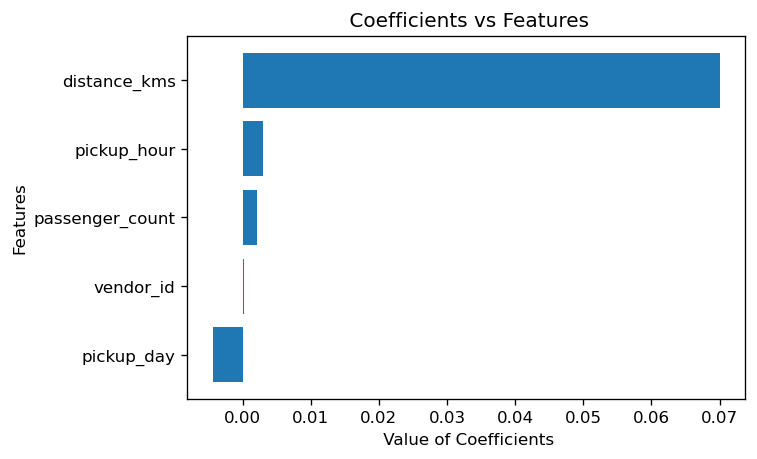

In [112]:
#Plotting the coefficients against the features
plt.figure(dpi=120)
plt.barh(coefficient['Feature_Columns'],coefficient['Coefficients'])
plt.title(" Coefficients vs Features")
plt.xlabel(" Value of Coefficients")
plt.ylabel("Features")
plt.show()

As you can see from the above bar chart the feature distance_kms has the highest value of coefficient as it has a high correlation with the target variable and the feature vendor_id has the lowest value of coefficient that means that it has a low correlation with the target variable

# Testing the model on the test dataset and calculating the value of R2 by using the score function

In [113]:
predicted_value=lr.predict(x_test)
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)
print(" Liner Regression Train Score(R2) = {}".format(train_score))
print(" Linear Regression Test Score(R2) = {}".format(test_score))

 Liner Regression Train Score(R2) = 0.3137771341761356
 Linear Regression Test Score(R2) = 0.31923843642494665


In [154]:
train_score

0.3137771341761356

# The value of R2 is 0.31749 which is less than 0.4 which indicates that the input variables have a low correlation with the target variable

In [192]:
#Calculating the MSE for linear Regression
mse_linear=MSE(predicted_value,y_test)

In [193]:
mse_linear

0.010529792049759668

# Implementing Ridge and Lasso Regression

In [114]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [115]:
ridge=Ridge(alpha=.3)
ridge.fit(x_train,y_train)

Ridge(alpha=0.3)

In [116]:
ridge.coef_

array([ 0.00014886,  0.0020657 ,  0.07006087, -0.00439168,  0.00294461])

In [194]:
predicted_ridge=ridge.predict(x_test)

In [195]:
mse_ridge=MSE(predicted_ridge,y_test)

In [196]:
mse_ridge

0.010529792006220881

In [118]:
ridge_train_score=ridge.score(x_train,y_train)
ridge_test_score=ridge.score(x_test,y_test)
print(" Ridge Regression train score(R2) = {}".format(ridge_train_score))
print(" Ridge Regression test score(R2) = {}".format(ridge_test_score))

 Ridge Regression train score(R2) = 0.3137771341640131
 Ridge Regression test score(R2) = 0.3192384392397727


In [119]:
lasso=Lasso(alpha=.3)
lasso.fit(x_train,y_train)
lasso.coef_

array([ 0.,  0.,  0., -0.,  0.])

As you can see  the coefficient value of lasso regression have become zero as the input variables have a very low correlation with the target variable which can also be see from the R2 score of liner regression which is less than 0.4 

In [197]:
predicted_lasso=lasso.predict(x_test)

In [199]:
mse_lasso=MSE(predicted_lasso,y_test)

In [200]:
mse_lasso

0.015467715743626985

In [121]:
lasso_train_score=lasso.score(x_train,y_train)
lasso_test_score=lasso.score(x_test,y_test)
print(" Lasso Regression train score = {}".format(lasso_train_score))
print(" Lasso Regression test score = {}".format(lasso_test_score))

 Lasso Regression train score = 0.0
 Lasso Regression test score = -3.257880701212912e-06


An R2 Score of 0.0 in the train dataset indicates that the input variable are not correlated  with the target variable

# Implementing KNN 

In [122]:
X_KNN=sample[['vendor_id','passenger_count','distance_kms','pickup_day','pickup_hour']]
Y_KNN=sample['trip_duration_hrs']


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_KNN=scaler.fit_transform(X_KNN)

In [124]:
x=pd.DataFrame(X_KNN)

In [125]:
x

,0,1,2,3,4
0,0.0,0.333333,0.242202,0.500000,0.434783
1,1.0,0.333333,0.259672,0.333333,0.782609
2,1.0,0.333333,0.286196,0.500000,0.478261
3,1.0,0.333333,0.420249,0.000000,0.913043
4,1.0,1.000000,0.305984,0.166667,0.434783
...,...,...,...,...,...
69258,1.0,0.333333,0.415290,0.166667,0.391304
69259,0.0,0.333333,0.232128,0.666667,0.434783
69260,1.0,0.552974,0.417168,0.666667,0.652174
69261,0.0,0.333333,0.124669,0.666667,1.000000


In [126]:
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_train_knn,y_test_knn=train_test_split(x,Y_KNN,random_state=1,test_size=0.3)


In [127]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as MSE
kreg=KNN(n_neighbors=5)
kreg.fit(x_train_knn,y_train_knn)
y_predicted=kreg.predict(x_test_knn)
k=MSE(y_predicted,y_test)
print(' MSE of for the test dataset is ',k)


 MSE of for the test dataset is  0.026376179515138442


In [128]:
k

0.026376179515138442

In [129]:
x_train_knn.shape

(48484, 5)

In [130]:
y_train_knn.shape

(48484,)

In [131]:
x_test_knn.shape

(20779, 5)

In [132]:
y_test.shape

(20779,)

# Plotting the elbow curve to find the best value of k

In [133]:
def elbow(K):
    mse_list=[]
    for i in K:
        kreg=KNN(n_neighbors=i)
        kreg.fit(x_train_knn,y_train_knn)
        y_predicted=kreg.predict(x_test_knn)
        error=MSE(y_predicted,y_test)
        mse_list.append(error)
    return mse_list
K=range(1,50,2)
mse_knn=elbow(K)
    

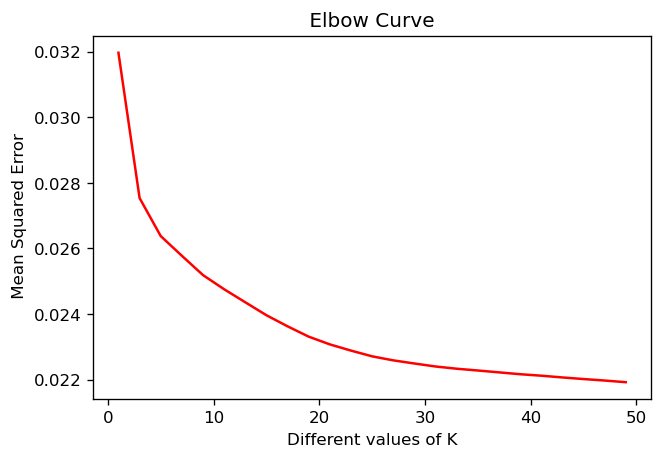

In [134]:
plt.figure(dpi=120)
plt.plot(K,mse_knn,color='Red')
plt.xlabel("Different values of K")
plt.ylabel(" Mean Squared Error")
plt.title(" Elbow Curve ")
plt.show()

Here we select the value of K=10 as after that the mean squared error is not decreasing sharply

In [206]:
kreg=KNN(n_neighbors=10)
kreg.fit(x_train_knn,y_train_knn)
y_predicted=kreg.predict(x_test_knn)
mse_knn=MSE(y_predicted,y_test_knn)

In [207]:
mse_knn

0.008224080378553192

# Calculating the R2 Score for KNN(Regression) for train and the test dataset

In [137]:
train_score_knn=kreg.score(x_train_knn,y_train_knn)
print(" R2 score(Decision Tree Regression) for training dataset is {} ".format(train_score_knn))

 R2 score(Decision Tree Regression) for training dataset is 0.5771184613007545 


In [138]:
test_score_knn=kreg.score(x_test_knn,y_test_knn)
print(" R2 score(Decision Tree Regression) for testing dataset is {} ".format(test_score_knn))

 R2 score(Decision Tree Regression) for testing dataset is 0.47199363409661343 


# Implementing Regression Tree

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
X_tree=sample[['vendor_id','passenger_count','distance_kms','pickup_day','pickup_hour']]
Y_tree=sample['trip_duration_hrs']
    

In [140]:
from sklearn.model_selection import train_test_split
x_train_tree,x_test_tree,y_train_tree,y_test_tree=train_test_split(X_tree,Y_tree,random_state=1,test_size=0.3)

In [141]:
tree=DecisionTreeRegressor(random_state=1)
dreg=tree.fit(x_train_tree,y_train_tree)
y_train_predict=tree.predict(x_train_tree)
y_test_predict=tree.predict(x_test_tree)
mse_train=MSE(y_train_predict,y_train_tree)
mse_test=MSE(y_test_predict,y_test_tree)
print('Train MSE = {}'.format(mse_train))
print('Test MSE = {}'.format(mse_test))
        


Train MSE = 0.0005427302863890035
Test MSE = 0.010803049000691628


Clearly the mean squared error is low for the train dataset and it is quite high for the test data set that means our model is overfitting and we need to use Cost Complexity pruning to prevent this overfitting

In [142]:
train_score_reg=tree.score(x_train_tree,y_train_tree)
test_score_reg=tree.score(x_test_tree,y_test_tree)

In [143]:
print('Train R2 Score for Decision tree(Regression) = {}'.format(train_score_reg))
print('Test R2 Score for Decision tree(Regression) = {}'.format(test_score_reg))

Train R2 Score for Decision tree(Regression) = 0.9652874903500697
Test R2 Score for Decision tree(Regression) = 0.30641744961460615


As you can see that the R2 Score for train data set is higher than the test data set that depicts that the model is overfitting that's why we need to use the cost complexity pruning to preduce it

# Cost Complexity Pruning

In [144]:
alpha=tree.cost_complexity_pruning_path(x_train_tree,y_train_tree)
alphas=alpha['ccp_alphas']

In [145]:
len(alphas)

34196

In [ ]:
for i in alphas:
    mse_train=[]
    mse_test=[]
    tree=DecisionTreeRegressor(ccp_alpha=i)
    tree.fit(x_train_tree,y_train_tree)
    y_train_predicted=tree.predict(x_train_tree)
    y_test_predicted=tree.predict(x_test_tree)
    mse_train.append(MSE(y_train_predicted,y_train_tree))
    mse_test.append(MSE(y_test_predicted,y_test_tree))
    
    

In [ ]:
mse_train

In [146]:
feature_importance=tree.feature_importances_

In [147]:
reg_feature_importance=pd.DataFrame({'Features':['vendor_id','passenger_count','distance_kms','pickup_day','pickup_hour'],'Feature_Importance':feature_importance})

In [148]:
reg_feature_importance.sort_values(by=['Feature_Importance'],ascending=True,inplace=True)

In [149]:
reg_feature_importance.reset_index(drop=True,inplace=True)

In [150]:
reg_feature_importance

,Features,Feature_Importance
0,vendor_id,0.017895
1,passenger_count,0.025874
2,pickup_day,0.051449
3,pickup_hour,0.098135
4,distance_kms,0.806647


# Plotting the graph of Feature Importance vs Features in Decision Tree(Regression)

Text(0.5, 1.0, ' Importance of features vs their name')

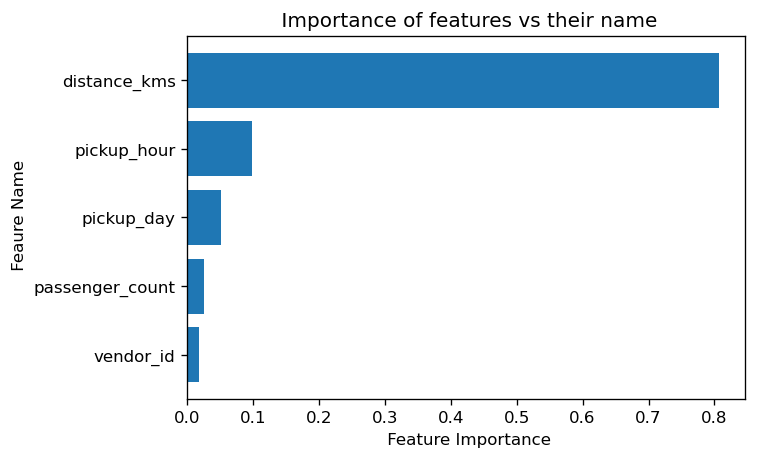

In [151]:
plt.figure(dpi=120)
plt.barh(reg_feature_importance['Features'],reg_feature_importance['Feature_Importance'])
plt.xlabel(" Feature Importance")
plt.ylabel(" Feaure Name")
plt.title(" Importance of features vs their name")

As you can see from the above graph that  variable "distance_kms" has the highest feature importance  and vendor_id has the lowest feature importance that means the variable distance_kms has the correlation with the target variable.

# Plotting the decision tree

In [152]:
from sklearn import tree

In [ ]:
tree.plot_tree(dreg,feature_names=['vendor_id','passenger_count','distance_kms','pickup_day','pickup_hour'],filled=True,max_depth=2)
plt.figure(dpi=100)


In [153]:
sample.shape

(69263, 15)

In [184]:
score=pd.DataFrame({'Model Name':['Linear Regression','Ridge Regression','Lasso Regression','KNN','Decision Tree Regression'], 'Train R2 Score' : [0.313777,ridge_train_score,lasso_train_score,train_score_knn,train_score_reg],'Test R2 Score':[test_score,ridge_test_score,lasso_test_score,test_score_knn,test_score_reg]})

In [185]:
score

,Model Name,Train R2 Score,Test R2 Score
0,Linear Regression,0.313777,0.319238
1,Ridge Regression,0.313777,0.319238
2,Lasso Regression,0.000000,-0.000003
3,KNN,0.577118,0.471994
4,Decision Tree Regression,0.965287,0.306417


In [174]:
train_test_score.iloc[0,1]

,Model Name,Train r2 Score,Test R2 Score
0,Linear Regression,0.313777,0.319238
1,Ridge Regression,0.313777,0.319238
2,Lasso Regression,0.000000,-0.000003
3,KNN,0.577118,0.471994
4,Decision Tree Regression,0.965287,0.306417


# Plotting the train Score of All models

Text(0, 0.5, 'Model Name ')

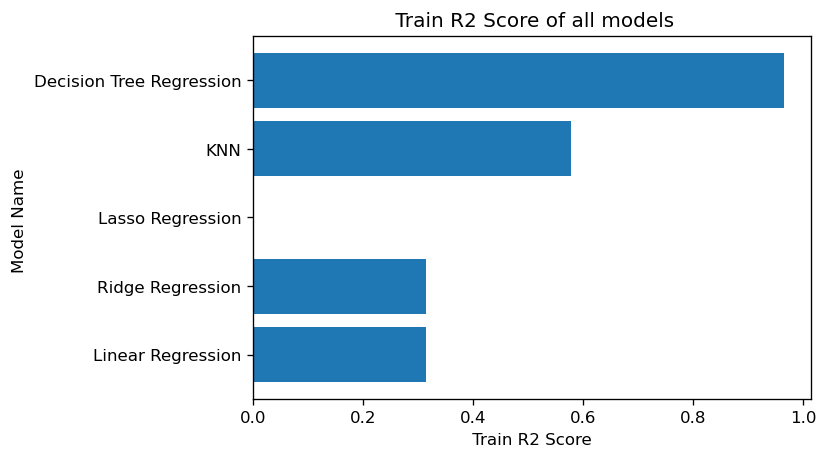

In [189]:
plt.figure(dpi=120)
plt.barh(score['Model Name'],score['Train R2 Score'])
plt.title(" Train R2 Score of all models")
plt.xlabel(" Train R2 Score ")
plt.ylabel("Model Name ")

As per the above graph and considering the train R2 Scores of all the models except the benchmark model decision tree regression has perfomed better than the other models as it has the highest value of R2 Score lasso regression which failed to depict the  relationship between the features and the target variables has a train score of zero

# Plotting the test Score for All models

Text(0, 0.5, ' Model Name ')

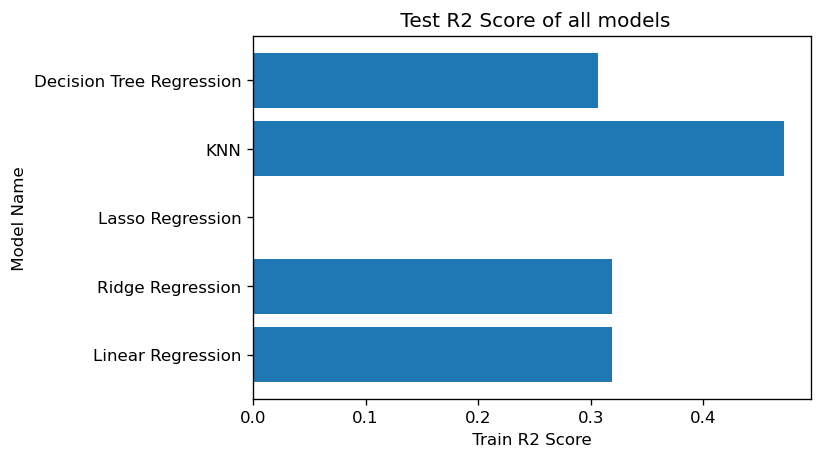

In [190]:
plt.figure(dpi=120)
plt.barh(score['Model Name'],score['Test R2 Score'])
plt.title(" Test R2 Score of all models")
plt.xlabel(" Test R2 Score ")
plt.ylabel(" Model Name ")

As per the above graph the test score R2 for decision tree has decreased as compared to its train score as it was overfitting the model as and the remianing test scores remain the same for the remaining models

# Evaluation Metrics to Compare all the models

R2 score could have been a good metric to compare with all the models as R2 score also shows the degree to which your input variable explains the variation in the output variable and it is derived from MSE but it is easy to compare Benchmark model with other models using MSE and also the values are small so the values of mse won't be very large thats why to compare all the models including the benchmark model we are using MSE

In [208]:
mse_matrix=pd.DataFrame({'Model Name':['Bench Mark Model','Linear Regression','Ridge Regression','Lasso Regression','KNN','Decision Tree Regression'],'MSE Values':[0.015617261962324469,0.010529792049759668,0.010529792006220881,0.015467715743626985,0.008224080378553192,0.010803049000691628]})

In [209]:
mse_matrix

,Model Name,MSE Values
0,Bench Mark Model,0.015617
1,Linear Regression,0.010530
2,Ridge Regression,0.010530
3,Lasso Regression,0.015468
4,KNN,0.008224
5,Decision Tree Regression,0.010803


Text(0, 0.5, ' Model Name ')

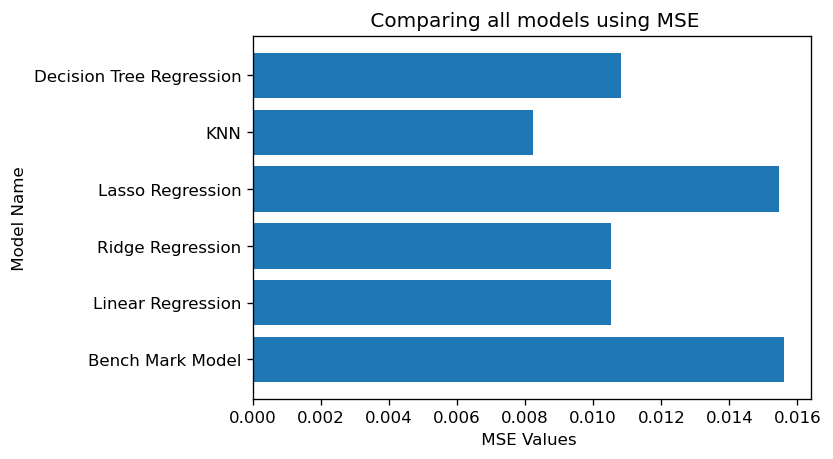

In [210]:
plt.figure(dpi=120)
plt.barh(mse_matrix['Model Name'],mse_matrix['MSE Values'])
plt.title(" Comparing all models using MSE")
plt.xlabel(" MSE Values  ")
plt.ylabel(" Model Name ")

After comparing all the models you will find that KNN has the least values of MSE which is equal to 0.008 aand as the benchmark model is used to set the worst possible mse that our model can determine  and as the input variables and the target variables do not had a great relationship the MSE for lasso and benchmark model is high and decision tree regression,linear and ridge regression which are used for regularization to prevent overfitting  have the same values of mse. So we can conclude that KNN has performed better than other models as ot has the lowest value of mse